In [2]:
from PipelineFunctions import *
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Yeast Dataset

In [3]:
import pandas as pd

yeast_df = pd.read_csv('./data/yeast.data', delim_whitespace=True, header=None)

yeast_data = yeast_df.to_numpy()
classes = list(np.unique(yeast_data[:,-1]))
X = yeast_data[:,1:-1]

lb_encoder = LabelEncoder()
y = lb_encoder.fit_transform(yeast_data[:,-1])

X_trn, X_tst, y_trn, y_tst = preprocess(X,y)

### 1.1 Logistic Regression

C:\Users\Moka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Dummy model: LogisticRegression()
With 60.597% train accuracy
With 59.417% test accuracy
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    4.7s finished


Best estimator: LogisticRegression(max_iter=10000, random_state=0, solver='newton-cg')
With 60.597% train accuracy
With 59.417% test accuracy


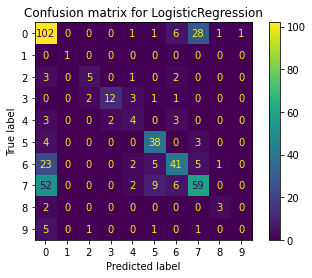

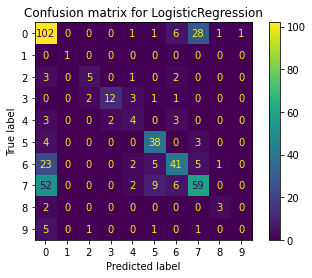

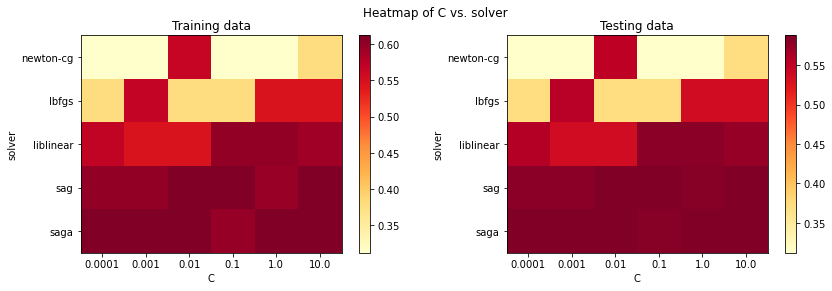

In [23]:
# Test a few different hyperparameters for Logistic Regression: C, solver
c_vals_lr = [0.0001,0.001,0.01,0.1,1.0,10.0]
s_vals_lr = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid_lr ={'C': c_vals_lr, 'solver' : s_vals_lr}

# Train a dummy Logistic Regression model with default values
dummy_lr = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.linear_model.LogisticRegression)

# Train different logistic regression models, using grid search and cross validation to find best hyperparameters.
gs_lr = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.linear_model.LogisticRegression,param_grid_lr,max_iter=10000,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_lr,X_tst,y_tst)

# Plot confusion matrix for best estimator of logistic regression
plot_confusion_matrix(gs_lr.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_lr, c_vals_lr, s_vals_lr, 'C', 'solver')

### 1.2 Support Vector Machine

Dummy model: SVC()
With 64.258% train accuracy
With 61.435% test accuracy
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.3s finished


Best estimator: SVC(C=10.0, gamma=0.01, random_state=0)
With 62.139% train accuracy
With 58.52% test accuracy


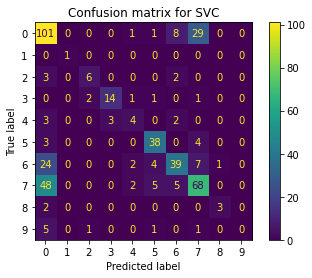

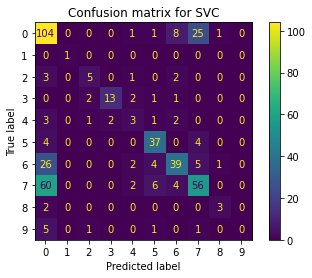

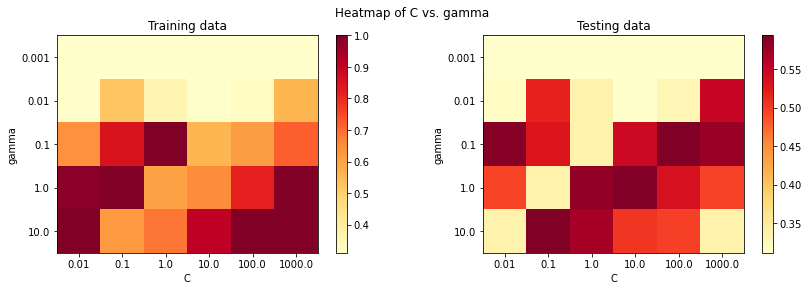

In [24]:
# Test a few different hyperparameters for SVM: C, gamma
c_vals_svm = [0.01,0.1,1.0,10.0,100.0,1000.0]
g_vals_svm = [0.001,0.01,0.1,1.0,10.0]
param_grid_svm = {'C': c_vals_svm, 'gamma' : g_vals_svm}

# Train a dummy SVM model with default values
dummy_svm = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.svm.SVC)

# Train different svm models, using grid search and cross validation to find best hyperparameters.
gs_svm = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.svm.SVC,param_grid_svm,kernel='rbf',random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_svm,X_tst,y_tst)

# Plot confusion matrix for best estimator of SVM
plot_confusion_matrix(gs_svm.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_svm, c_vals_svm, g_vals_svm, 'C', 'gamma')

### 1.3 Decision Tree

Dummy model: DecisionTreeClassifier()
With 100.0% train accuracy
With 50.224% test accuracy
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)
With 62.428% train accuracy
With 59.641% test accuracy


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.1s finished


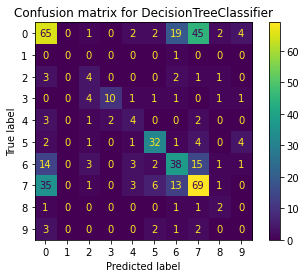

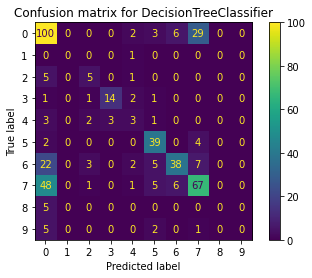

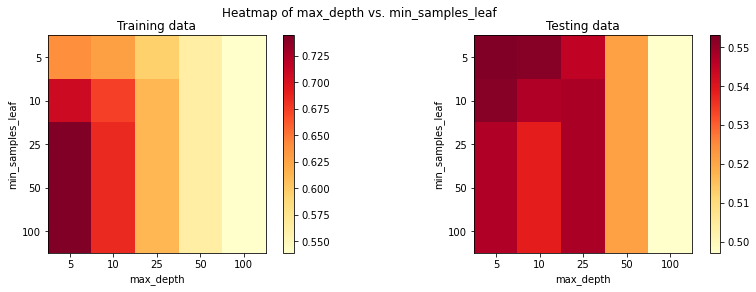

In [25]:
# Test a few different hyperparameters for Decision Tree: max_depth, min_samples_leaf
dep_vals_dt = [5, 10, 25, 50, 100]
samp_leaf_dt = [5, 10, 25, 50, 100]
param_grid_dt = {'max_depth' : dep_vals_dt, 'min_samples_leaf' : samp_leaf_dt}

# Train a dummy Decision Tree model with default values
dummy_dt = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.tree.DecisionTreeClassifier)

# Train different decision tree  models, using grid search and cross validation to find best hyperparameters.
gs_dt = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.tree.DecisionTreeClassifier,param_grid_dt,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_dt,X_tst,y_tst)

# Plot confusion matrix for best estimator of decision tree
plot_confusion_matrix(gs_dt.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_dt, dep_vals_dt, samp_leaf_dt, 'max_depth', 'min_samples_leaf')

### 1.4 Random Forest

Dummy model: RandomForestClassifier()
With 100.0% train accuracy
With 60.314% test accuracy
Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:  1.1min finished


Best estimator: RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)
With 85.549% train accuracy
With 64.574% test accuracy


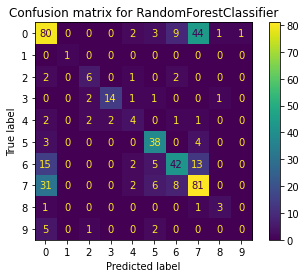

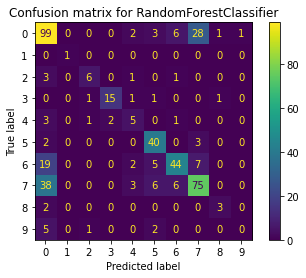

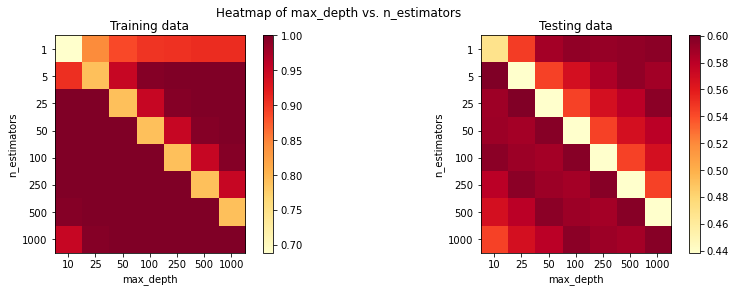

In [26]:
# Test a few different hyperparameters for Random Forest: max_depth, n_estimators
dep_vals_rf = [10,25,50, 100,250,500,1000]
est_vals_rf = [1,5,25,50,100,250,500,1000]
param_grid_rf = {'max_depth': dep_vals_rf, 'n_estimators' : est_vals_rf}

# Train a dummy Random Forest model with default values
dummy_rf = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.RandomForestClassifier)

# Train different random forest models, using grid search and cross validation to find best hyperparameters.
gs_rf = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.RandomForestClassifier,param_grid_rf,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_rf,X_tst,y_tst)

# Plot confusion matrix for best estimator of random forest
plot_confusion_matrix(gs_rf.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_rf, dep_vals_rf, est_vals_rf, 'max_depth', 'n_estimators')

### 1.5 K-nearest Neighbours

Dummy model: KNeighborsClassifier()
With 69.75% train accuracy
With 57.175% test accuracy
Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    4.3s finished


Best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=11)
With 63.873% train accuracy
With 58.072% test accuracy


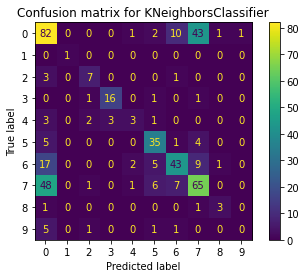

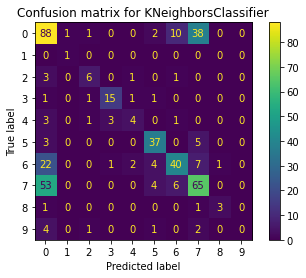

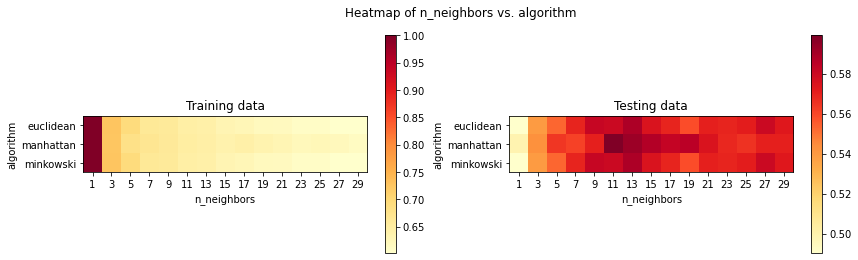

In [27]:
# Test a few different hyperparameters for K-nearest neighbours: n_neighbors, algorithm
n_vals_k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
m_vals_k = ['euclidean', 'manhattan', 'minkowski']
param_grid_knn = {'n_neighbors': n_vals_k, 'metric' : m_vals_k}

# Train a dummy KNN model with default values
dummy_knn = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.neighbors.KNeighborsClassifier)

# Train different KNN models, using grid search and cross validation to find best hyperparameters.
gs_knn = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.neighbors.KNeighborsClassifier,param_grid_knn)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_knn,X_tst,y_tst)

# Plot confusion matrix for best estimator of KNN
plot_confusion_matrix(gs_knn.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_knn, n_vals_k, m_vals_k, 'n_neighbors', 'algorithm')

### 1.6 AdaBoost

Dummy model: AdaBoostClassifier()
With 33.044% train accuracy
With 32.96% test accuracy
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    6.5s finished


Best estimator: AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)
With 44.99% train accuracy
With 43.498% test accuracy


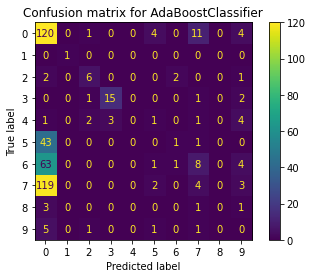

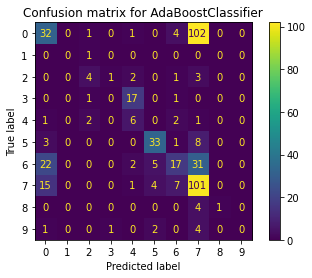

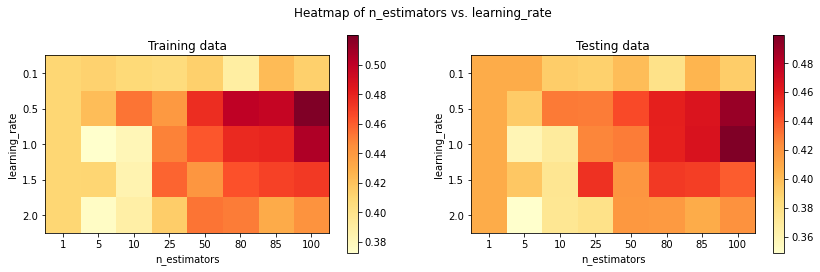

In [28]:
# Test a few different hyperparameters for AdaBoost: n_estimators, learning_rate
est_vals_ada = [1,5,10,25,50,80,85,100]
learn_vals_ada = [0.1, 0.5, 1.0, 1.5, 2.0]
param_grid_ada = {'n_estimators': est_vals_ada, 'learning_rate' : learn_vals_ada}

# Train a dummy AdaBoost model with default values
dummy_ada = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.AdaBoostClassifier)

# Train different AdaBoost models, using grid search and cross validation to find best hyperparameters.
gs_ada = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.ensemble.AdaBoostClassifier,param_grid_ada, algorithm='SAMME', random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_ada,X_tst,y_tst)

# Plot confusion matrix for best estimator of AdaBoost
plot_confusion_matrix(gs_ada.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_ada, est_vals_ada, learn_vals_ada, 'n_estimators', 'learning_rate')

### 1.7 Gaussian Naive Bayes

Dummy model: GaussianNB()
With 13.391% train accuracy
With 17.937% test accuracy
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best estimator: GaussianNB(var_smoothing=1.0)
With 57.707% train accuracy
With 58.296% test accuracy


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


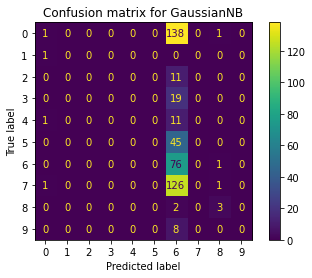

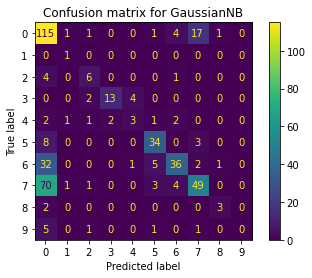

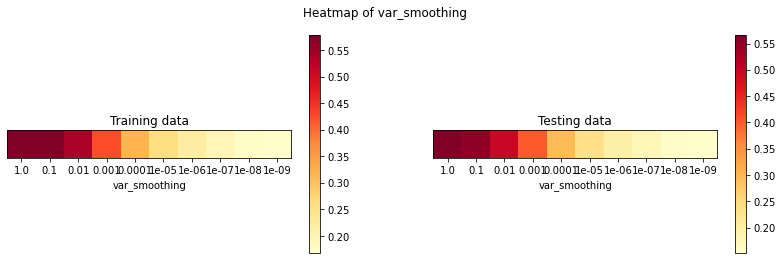

In [29]:
# Test a few different hyperparameters for Gaussian Naive Bayes: var_smoothing
smooth_gnb = np.logspace(0,-9, num=10)
param_grid_gnb = {'var_smoothing' : smooth_gnb}

# Train a dummy Gaussian Naive Bayes model with default values
dummy_gnb = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.naive_bayes.GaussianNB)

# Train different Gaussian Naive Bayes models, using grid search and cross validation to find best hyperparameters.
gs_gnb = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.naive_bayes.GaussianNB,param_grid_gnb)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_gnb,X_tst,y_tst)

# Plot confusion matrix for best estimator of Gaussian Naive Bayes
plot_confusion_matrix(gs_gnb.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_1(gs_gnb, smooth_gnb, 'var_smoothing')

### 1.8 Neural Network

C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Dummy model: MLPClassifier()
With 65.8% train accuracy
With 61.435% test accuracy
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multil

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.2min finished
C:\Users\Moka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best estimator: MLPClassifier(batch_size=100, hidden_layer_sizes=(100, 100), max_iter=1000,
              random_state=0, solver='sgd')
With 68.786% train accuracy
With 59.865% test accuracy


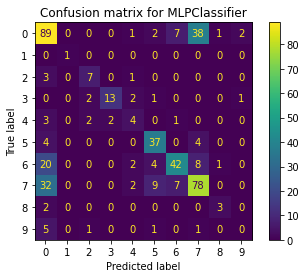

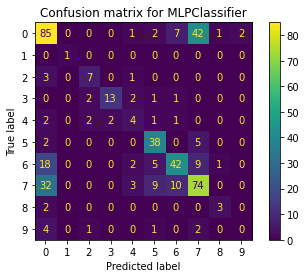

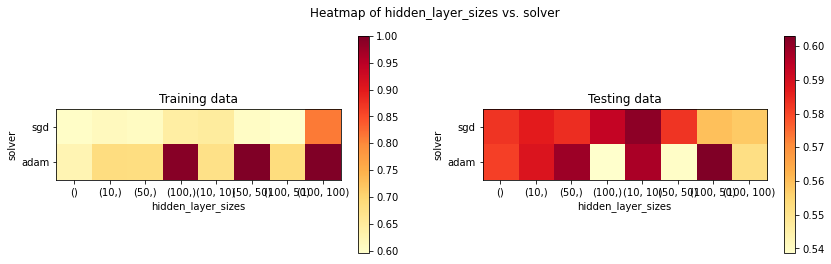

In [5]:
# Test a few different hyperparameters for Neural Networks: hidden_layer_sizes, solver
hl_vals = [(),(10,),(50,),(100,),(10,10),(50,50),(100,50),(100,100)]
solv_vals = ['sgd','adam']
param_grid_nn = {'hidden_layer_sizes' : hl_vals, 'solver' : solv_vals}

# Train a dummy Neural Net model with default values
dummy_nn = train_dummy_model(X_trn, y_trn, X_tst, y_tst, sklearn.neural_network.MLPClassifier)

# Train different Neural Net models, using grid search and cross validation to find best hyperparameters.
gs_nn = grid_search(X_trn, y_trn, X_tst, y_tst, sklearn.neural_network.MLPClassifier,param_grid_nn,activation='relu',max_iter=1000,batch_size=100,learning_rate_init=0.001,random_state=0)

# Plot confusion matrix for dummy model
plot_confusion_matrix(dummy_nn,X_tst,y_tst)

# Plot confusion matrix for best estimator of Neural Net
plot_confusion_matrix(gs_nn.best_estimator_,X_tst,y_tst)

# Plot heatmap of the gridsearch
plot_gridsearch_2(gs_nn, hl_vals, solv_vals, 'hidden_layer_sizes', 'solver')